## Word2vec

Это модель, которая позволяет строить векторы слов, используя контекстную информацию из окрестности слова.

Статья о Word2vec вышла в 2013 году и стала одним из революционных открытий в области обработки естественного языка (NLP). Она была разработана Томасом Миколовым в соавторстве с Google, а позже была сделана открытым исходным кодом для использования и развития сообщества.  
Ссылка на документ: https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf.

#### Контролируемое и неконтролируемое обучение
Обучение с учителем и без учителя будет подробно рассмотрено позже, но сейчас получим краткое представление.
- Обучение с учителем (контролируемое): сюда входят такие случаи, как прогнозирование рака молочной железы, когда данные размечены - в них каждая точка принадлежит либо человеку, страдающему раком молочной железы, либо тому, кто им не болен.
- Обучение без учителя (неконтролируемое): помимо задач, упомянутых в предыдущем пункте, существуют задачи, в которых нужно определить сегменты или группы клиентов на основе их моделей расходов. Эти точки данных не имеют меток, таких как высокие или низкие расходы, и цель состоит в том, чтобы просто сгруппировать пользователей. Такие задачи относятся к сфере неконтролируемого обучения.

Word2vec — это неконтролируемый метод создания встраивания (эмбеддинга) слов. В архитектуре Word2vec предпринимается попытка выполнить одно из следующих действий:
- предсказать целевое слово на основе контекстного слова
- предсказать контекстное слово на основе целевого слова

Несмотря на то, что слова предсказываются, компонент предсказания или сам атрибут класса исходит из текста или корпуса. Следовательно, нет конкретного доступного атрибута класса, как в случае контролируемого обучения. Из-за этого Word2vec относится к классу неконтролируемых алгоритмов. Всё обучение происходит из неструктурированных данных без наблюдения (без учителя).

#### Предварительно обученный Word2vec

Результатом алгоритма Word2vec является |V| * D матрица , где |V| — размер словаря, для которого мы хотим использовать векторные представления, а D — количество измерений, используемых для представления каждого вектора слова. Как вы уже догадались, каждая строка в этой матрице содержит вложение отдельного слова в словарь. Значение D можно изменить и поиграть с ним в зависимости от нескольких факторов, таких как размер текстового корпуса и различные отношения, которые необходимо зафиксировать. Как правило, D принимает значения между 50 и 300 в реальных случаях использования.

Существует предварительно обученная глобально доступная модель Word2vec, которую Google обучил на наборе данных Google News. Её словарный запас составляет 3 миллиона слов и фраз, а каждый вектор имеет 300 измерений. Эта модель имеет размер 1,5 ГБ и может быть загружена с https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g. 

Библиотека Python gensim предоставляет различные методы прямого использования предварительно обученной модели или её тонкой настройки. Это позволяет построить модель Word2vec с нуля на основе любого предоставленного набора данных.

#### Изучение предварительно обученной модели Word2vec с помощью gensim

In [3]:
# install the genism library
!pip install gensim

In [4]:
# import the gensim library and the KeyedVectors component
import gensim
from gensim.models import KeyedVectors

In [6]:
# load the pretrained vectors from the pretrained Word2vec model file
model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 

In [13]:
# validate the size of the pretrained Word2vec vocabulary
len(model)

3000000

In [14]:
# explore the size of each Word2vec vector
model.vector_size

300

In [20]:
# explore the pretrained Word2vec vocabulary
normed_vector = model.get_vector("rock", norm=True)
normed_vector

In [22]:
# check the most_similar functionality
model.most_similar('Delhi')

[('Kolkata', 0.7663769125938416),
 ('Mumbai', 0.7306069731712341),
 ('Lucknow', 0.7277829647064209),
 ('Patna', 0.7159016728401184),
 ('Guwahati', 0.7072612643241882),
 ('Jaipur', 0.6992815136909485),
 ('Hyderabad', 0.6983195543289185),
 ('Ranchi', 0.6962575912475586),
 ('Bhubaneswar', 0.6959235072135925),
 ('Chandigarh', 0.6940240263938904)]

Эти выходные данные показывают, что вложение для 'Delhi' больше всего похоже на 'Kolkata'.

In [23]:
result = model.most_similar(positive=['man', 'queen'], negative=['king'], topn=1)
print(result)

[('woman', 0.7609435319900513)]


In [25]:
result = model.most_similar(positive=['France', 'Rome'], negative=['Italy'], topn=1)
print(result)

[('Paris', 0.7190686464309692)]


#### Расчет потерь и обратное распространение

После получения нормализованной вероятности того, является ли что-то контекстным словом, она сравнивается с фактическим ожидаемым контекстным словом, и вычисляется функция потерь или ошибка в прогнозировании, как показано на следующеv рисунке. Модели предсказывают прогнозируемый вектор, который содержит нормализованную вероятность того, что каждое слово в словаре является контекстным словом. Целевой вектор — это горячий вектор, который указывает, какое значение, как мы ожидаем, будет контекстным словом. Эти два вектора вычитаются, чтобы вычислить ошибку, допущенную при предсказании слова контекста, когда целевое слово задано в качестве входных данных:

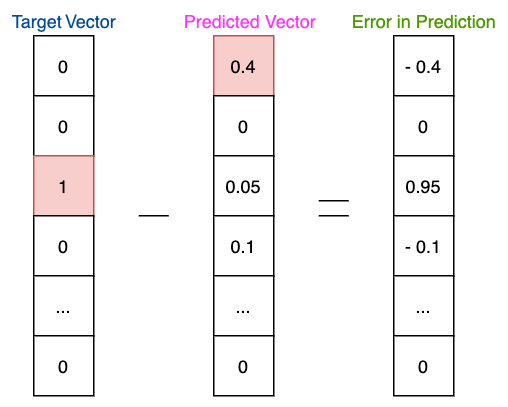

В рамках расчета функции потерь мы пытаемся выяснить, насколько близка или далека модель от предсказания правильного контекстного слова. Результаты функции потерь показывают, насколько хорошо или плохо модель предсказала контекстное слово. Вычисленная ошибка отправляется обратно в модель, где веса или записи в матрицах внедрения и контекста корректируются в зависимости от того, насколько они были ответственны за правильное или неправильное предсказание слова контекста. Этот метод называется обратным распространением. Вы можете прочитать больше о функциях обратного распространения и потерь на http://cs231n.github.io/optimization-2/ и http://cs231n.github.io/neural-networks-2/#losses соответственно .

Предыдущие шаги повторяются несколько раз или в течение нескольких эпох (это настраиваемый параметр), и в конце обучения матрица встраивания обеспечивает нужный нам результат. Он вытягивается из архитектуры, и каждая строка в этой обученной матрице содержит вложение слова для слова в словаре. i - я строка здесь содержит вектор слов для i -го слова в нашем словаре:

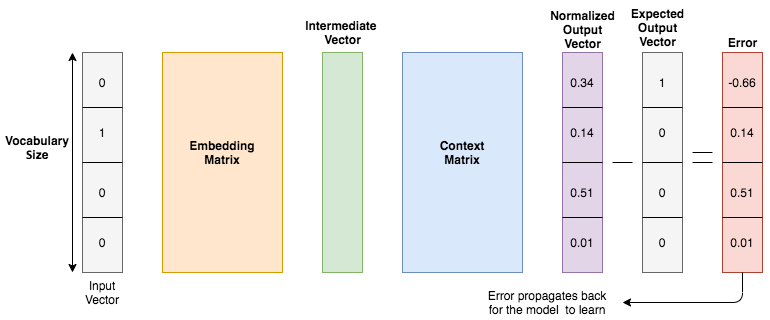

На этой диаграмме показаны все компоненты и различные взаимодействия, связанные с построением модели Word2vec на основе метода Skip-gram.

Библиотека gensim предоставляет удобный интерфейс для построения модели Word2vec. Мы начнем с построения очень простой модели с наименьшим количеством возможных параметров, а затем будем достраивать её.

### Создание базовой модели Word2vec

Начнём с импорта модуля Word2vec из gensim, определив несколько предложений в качестве наших данных, а затем построим модель, используя следующий код:

In [26]:
from gensim.models import Word2Vec

sentences = [["I", "am", "trying", "to", "understand", "Natural", 
              "Language", "Processing"],
            ["Natural", "Language", "Processing", "is", "fun", 
             "to", "learn"],
            ["There", "are", "numerous", "use", "cases", "of", 
             "Natural", "Language", "Processing"]]

model = Word2Vec(sentences, min_count=1)

Мы можем предоставить модулю Word2vec список токенизированных предложений в качестве входных данных, как мы сделали в предыдущем примере. Но также можем предоставить м текстовый корпус в качестве входных данных, используя параметр corpus_file, поскольку корпус содержит список предложений, где слова в каждом предложении разделены пробелами.

Параметр min_count помогает создать собственный словарь на основе самого текста. Значение min_count задает минимальный порог, чтобы векторы строились только для слов, встречающихся чаще, чем значение, указанное в параметре min_count.

Здесь мы использовали очень небольшой список специально построенных предложений для построения модели Word2vec. Однако это можно распространить на любой набор данных. В реальных сценариях весь набор данных предоставляется в виде списка предложений или корпуса в целом.

In [27]:
model.vector_size

100

In [35]:
# validate the size of the pretrained Word2vec vocabulary
len(model.wv)

17

Параметр min_count помогает ограничить словарный запас, чтобы векторы слов строились только для слов, которые встречаются min_count в корпусе хотя бы раз:

In [36]:
model = Word2Vec(sentences, min_count=2)

In [37]:
len(model.wv)

4

Размер словарного запаса 4обусловлен тем, что только четыре слова встречаются в нашем корпусе дважды или более.

In [43]:
list(model.wv.index_to_key)

['Processing', 'Language', 'Natural', 'to']

Многомерные векторы захватывают больше информации по измерениям, особенно когда корпус и словарный запас велики, а данные очень разнообразны.

Давайте попробуем построить модель, в которой каждый вектор является 300-мерным, используя следующий блок кода:

In [45]:
model = Word2Vec(sentences, min_count=2, vector_size = 300)

#### Другие параметры:

- sg: при 1 используется подхода Skip-gram, при 0 используется метод CBOW
- negative: если он больше 0, указывает на то, что следует использовать отрицательную выборку, а целочисленное значение означает количество отрицательных выборок для использования.
- workers: определяет количество потоков, используемых для обучения

### Создание модуля корректора орфографии/подсказки слов с использованием fastText
Давайте попробуем построить модель fastText на основе некоторых данных комментариев, которые можно получить в результате задачи классификации токсичных комментариев Kaggle. Эти данные можно получить с https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge. Мы возьмём столбец комментариев из набора данных и построим на его основе модель fastText. Мы также добавим некоторые неправильные варианты написания в построенную модель и посмотрим, насколько хорошо модель справляется с их исправлением. Для этого упражнения мы будем использовать реализацию fastText в Gensim.

In [68]:
# import the necessary libraries
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import FastText
import io
import collections
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kasutaja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kasutaja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
# read the data into basic data structures using the following code snippet
words = []
data = []
with io.open('comments.txt', 'r', encoding='utf-8') as file:
    for entry in file:
        entry = entry.strip()
        data.append(entry)
        words.extend(entry.split())

In [70]:
# fetch some basic information about the data in terms of the most common words in the corpus
unique_words = []
unique_words = collections.Counter(words)
unique_words.most_common(10)

[('the', 445892),
 ('to', 288753),
 ('of', 219279),
 ('and', 207335),
 ('a', 201765),
 ('I', 182618),
 ('is', 164602),
 ('you', 157025),
 ('that', 140495),
 ('in', 130244)]

In [71]:
# data preprocessing
def text_clean(corpus, keep_list):
    '''
    Purpose : Function to keep only alphabets, digits and certain words (punctuations, qmarks, tabs etc. removed)
    
    Input : Takes a text corpus, 'corpus' to be cleaned along with a list of words, 'keep_list', which have to be retained
            even after the cleaning process
    
    Output : Returns the cleaned text corpus
    
    '''
    cleaned_corpus = pd.Series()
    for row in corpus:
        qs = []
        for word in row.split():
            if word not in keep_list:
                p1 = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=word)
                p1 = p1.lower()
                qs.append(p1)
            else : qs.append(word)
        cleaned_corpus = cleaned_corpus.append(pd.Series(' '.join(qs)))
    return cleaned_corpus


def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
    stop = set(stopwords.words('english'))
    for word in wh_words:
        stop.remove(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus


def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus


def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus


def preprocess(corpus, keep_list, cleaning = True, stemming = False, stem_type = None, lemmatization = False, remove_stopwords = True):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)
    
    Input : 
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'cleaning', 'stemming', 'lemmatization', 'remove_stopwords' - Boolean variables indicating whether a particular task should 
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer
    
    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together
    
    Output : Returns the processed text corpus
    
    '''
    
    if cleaning == True:
        corpus = text_clean(corpus, keep_list)
    
    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
    else :
        corpus = [[x for x in x.split()] for x in corpus]
    
    if lemmatization == True:
        corpus = lemmatize(corpus)
        
        
    if stemming == True:
        corpus = stem(corpus, stem_type)
    
    corpus = [' '.join(x) for x in corpus]        

    return corpus

common_dot_words = ['U.S.', 'Mr.', 'Mrs.', 'D.C.']

In [72]:
# preprocessing with lemmatization
preprocessed_corpus = preprocess(data, \
                                 keep_list = common_dot_words, stemming = False, \
                                 stem_type = None, lemmatization = True, \
                                 remove_stopwords = True)


In [73]:
preprocessed_corpus

['explanation',
 'why edit make username hardcore metallica fan revert vandalisms closure gas vote new york dolls fac please remove template talk page since retire 89 205 38 27',
 'aww match background colour seemingly stick thank talk 21 51 january 11 2016 utc',
 'hey man really try edit war guy constantly remove relevant information talk edit instead talk page seem care format actual info',
 '',
 '',
 'make real suggestions improvement wonder section statistics later subsection type accidents think reference may need tidy exact format ie date format etc later one else first preferences format style reference want please let know',
 '',
 'appear backlog article review guess may delay reviewer turn list relevant form eg wikipedia good article nominations transport',
 'sir hero chance remember what page',
 '',
 '',
 'congratulations well use tool well talk',
 'cocksucker piss around work',
 'vandalism matt shirvington article revert please ban',
 'sorry word nonsense offensive anyway in

In [ ]:
preprocessed_data = []
for line in data:
    if line != "":
        preprocessed_data.append(line.split())

In [ ]:
model = FastText(size=300, window=3, min_count=1, min_n=1, max_n=5)

In [ ]:
model.build_vocab(sentences=preprocessed_data)